This project is about creating a directed graph(Digraph) from text data web scraped from english.onlinekhabar.com. The web harvesting is done using famous beautifulsoup library in python.

In [ ]:
#importing necessary libraries
from bs4 import BeautifulSoup as bs
import requests as r
import pandas as pd
import numpy as np
import spacy       # liabrary for NLP
from spacy.matcher import Matcher
from spacy.tokens import Span



In [ ]:
page=r.get('https://english.onlinekhabar.com')
doc=bs(page.content,'html.parser')
links=[]
for heading in doc.findAll('h2'):
  if len(str(heading.text))>50:
    links.append(heading.a['href'])
links

['https://english.onlinekhabar.com/veda-software-school-management-nepal.html',
 'https://english.onlinekhabar.com/ministry-of-women-no-women-leadership.html',
 'https://english.onlinekhabar.com/neocolonialism-cost-nepali-economy.html',
 'https://english.onlinekhabar.com/tim-watts-australia-minister-ktm.html',
 'https://english.onlinekhabar.com/ang-tawa-sherpa-surrenders.html',
 'https://english.onlinekhabar.com/ministry-of-women-no-women-leadership.html',
 'https://english.onlinekhabar.com/neocolonialism-cost-nepali-economy.html',
 'https://english.onlinekhabar.com/top-bahadur-rayamajhi-arrest-scam.html',
 'https://english.onlinekhabar.com/swadeshi-make-in-nepal-summit-2023.html',
 'https://english.onlinekhabar.com/jhapa-return-after-funeral.html',
 'https://english.onlinekhabar.com/tim-watts-australia-minister-ktm.html',
 'https://english.onlinekhabar.com/veda-software-school-management-nepal.html',
 'https://english.onlinekhabar.com/ang-tawa-sherpa-surrenders.html',
 'https://englis

The website of Onlinekhabar is static, and we get links for around 50 news.Among them we will take first one and sentences of the news is processed

In [ ]:
page=r.get(links[0])
doc=bs(page.content)
news=doc.find_all('div',{'class':'ok-details-content-left'})

txt=news[0].text.strip()[260:3000]

In [ ]:
txt=txt.replace('\n+ ','')
txt

'nts\n\n\n\n\n\n\n\nVeda has been a leading school and college management system in Nepal. Photo: Courtesy Ingrails\nSchools in Nepal are always busy; many of them are even chaotic. There are students busy catching up with the syllabus of different subjects and teachers preparing for the classes, checking the papers and results. Talk to the people involved in school management, most of them tell you why the country’s school management system needs a revolution.\nThere are over 30,000 schools in Nepal, and the majority of them are still undertaking the process manually. Students have to write long papers and teachers either take the copies home or stay back at school burning the midnight oil. Then, working parents, in particular, have a hard time checking their wards’ progress. \nPerhaps the sector awaits a digital revolution. Realising this, a team of young entrepreneurs have introduced Veda to many schools across the country.\nNow, with Veda, students and teachers save their time stay

ra

we should split the paragraph into sentences and clean the text using nltk library

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

sent=sent_tokenize(txt)
sent


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['nts\n\n\n\n\n\n\n\nVeda has been a leading school and college management system in Nepal.',
 'Photo: Courtesy Ingrails\nSchools in Nepal are always busy; many of them are even chaotic.',
 'There are students busy catching up with the syllabus of different subjects and teachers preparing for the classes, checking the papers and results.',
 'Talk to the people involved in school management, most of them tell you why the country’s school management system needs a revolution.',
 'There are over 30,000 schools in Nepal, and the majority of them are still undertaking the process manually.',
 'Students have to write long papers and teachers either take the copies home or stay back at school burning the midnight oil.',
 'Then, working parents, in particular, have a hard time checking their wards’ progress.',
 'Perhaps the sector awaits a digital revolution.',
 'Realising this, a team of young entrepreneurs have introduced Veda to many schools across the country.',
 'Now, with Veda, students 

In some sentences there are \n found so to remove we use regular expression,and string replace function to remove \n from middle of the sentence while strip removes heading and trailing \n(new lines)

In [ ]:
import re
for sen in sent:
  sen=re.sub(r'\n','',sen)
  sen=sen.strip('\n')
  sen=sen.replace('\n','')
sent



['nts\n\n\n\n\n\n\n\nVeda has been a leading school and college management system in Nepal.',
 'Photo: Courtesy Ingrails\nSchools in Nepal are always busy; many of them are even chaotic.',
 'There are students busy catching up with the syllabus of different subjects and teachers preparing for the classes, checking the papers and results.',
 'Talk to the people involved in school management, most of them tell you why the country’s school management system needs a revolution.',
 'There are over 30,000 schools in Nepal, and the majority of them are still undertaking the process manually.',
 'Students have to write long papers and teachers either take the copies home or stay back at school burning the midnight oil.',
 'Then, working parents, in particular, have a hard time checking their wards’ progress.',
 'Perhaps the sector awaits a digital revolution.',
 'Realising this, a team of young entrepreneurs have introduced Veda to many schools across the country.',
 'Now, with Veda, students 

In [ ]:
from string import punctuation
import string
lem=WordNetLemmatizer()

Function clean_sent cleans the puncuations,remove stopwords and also lemmatize the sentences(means to come to root words). It is preprocessing function used for cleaning sentences.Our goal is to derive the same single word which are similar in all sentences. Functions can be called from anywhere if required.

In [ ]:
def clean_sent(sents):
  flist=[]
  for sent in sents:
    punc=''.join([i for i in sent if i not in string.punctuation])
    tok=word_tokenize(punc)
    stop=[i for i in tok if i not in stop_words]
    le=[lem.lemmatize(w,pos='v') for w in stop if w.isalpha()]
    clean=' '.join([w  for w in le])
    flist.append(clean)
  return flist
flist=clean_sent(sent)
flist

['nts Veda lead school college management system Nepal',
 'Photo Courtesy Ingrails Schools Nepal always busy many even chaotic',
 'There students busy catch syllabus different subject teachers prepare class check paper result',
 'Talk people involve school management tell country school management system need revolution',
 'There school Nepal majority still undertake process manually',
 'Students write long paper teachers either take copy home stay back school burn midnight oil',
 'Then work parent particular hard time check ward progress',
 'Perhaps sector await digital revolution',
 'Realising team young entrepreneurs introduce Veda many school across country',
 'Now Veda students teachers save time stay update syllabus grade exams whereas parent easier way stay update children progress',
 'Veda mentor guide school Nepal solve basic managerial system',
 'What Veda',
 'Veda school management software application design specifically school Ingrails software company',
 'The flagship app

To save cleaned file in txt format we use this code

In [ ]:
file=open('clean.txt','a',encoding='utf-8')
for sen in sent:
  file.write(str(sen))
file.close()

Here we use function get_entities to seperate subjects and object from the sentences.

In [ ]:
import spacy
nlp=spacy.load('en_core_web_sm')

def get_entities(sent):
  
  modifier,prefix,ent1,ent2,prev_tok,prev_text='','','','','',''
  
  for tok in nlp(sent):
    if tok.dep_ != "punct":
      
      if tok.dep_ == "compound":
        prefix = tok.text
        
        if prev_tok == "compound":
          prefix = prev_text + " "+ tok.text
      
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        
        if prev_tok == "compound":
          modifier = prev_text + " "+ tok.text
      
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prev_tok = ""
        prev_text = ""      
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text

      prev_tok = tok.dep_
      prev_text = tok.text
  return [ent1.strip(), ent2.strip()]

In [ ]:
pair=[]
for sen in flist:
  pair.append(get_entities(sen))

pair

[['nts  Veda', 'college management system'],
 ['Ingrails Schools Nepal', 'even  chaotic'],
 ['subject catch teachers', 'check paper result'],
 ['school management system', 'revolution'],
 ['There school Nepal majority', 'still  process'],
 ['Students', 'long copy home'],
 ['', 'time ward progress'],
 ['', 'digital sector revolution'],
 ['young  entrepreneurs', 'many  country'],
 ['update children', 'time syllabus grade exams'],
 ['guide school Nepal', 'managerial  system'],
 ['', ''],
 ['', 'specifically Ingrails software company'],
 ['flagship app team', 'entire knowledgesharing teachers'],
 ['young Veda entrepreneurs', 'Ingrails'],
 ['user show', 'Veda'],
 ['disciplinary Additionally school performance', 'similar  use'],
 ['class one graduate class platform', 'class one graduate class platform'],
 ['piece information', 'easily school students'],
 ['', '']]

Here we extracted subject and object from the cleaned sentences, Now we are concerened with relations(verbs)

In [ ]:
source=[j[0] for j in pair]
target=[j[1] for j in pair]

In [ ]:
from spacy.matcher import Matcher
from spacy.tokens import Span

def get_verbs(sent):
  doc=nlp(sent)
  matcher=Matcher(nlp.vocab)
  pattern=[{'DEP':'ROOT'},{'DEP':'prep','OP':'?'},{'DEP':'agent','OP':'?'},{'POS':'ADJ','OP':'?'}]
  matcher.add('matching_1',[pattern],on_match=None)
  matches=matcher(doc)
  x=len(matches)-1
  span=doc[matches[x][1]:matches[x][2]]
  return (span.text)


relations=[get_verbs(s) for s in flist]
relations

['lead',
 'busy many',
 'prepare',
 'involve',
 'undertake',
 'write long',
 'work',
 'await digital',
 'introduce',
 'save',
 'solve basic',
 'Veda',
 'design',
 'attempt digitise',
 'cofounded',
 'use',
 'explain',
 'look',
 'disseminate among',
 'versions']

We collected subject object and their relations and we are going to plot the relationship diagraph

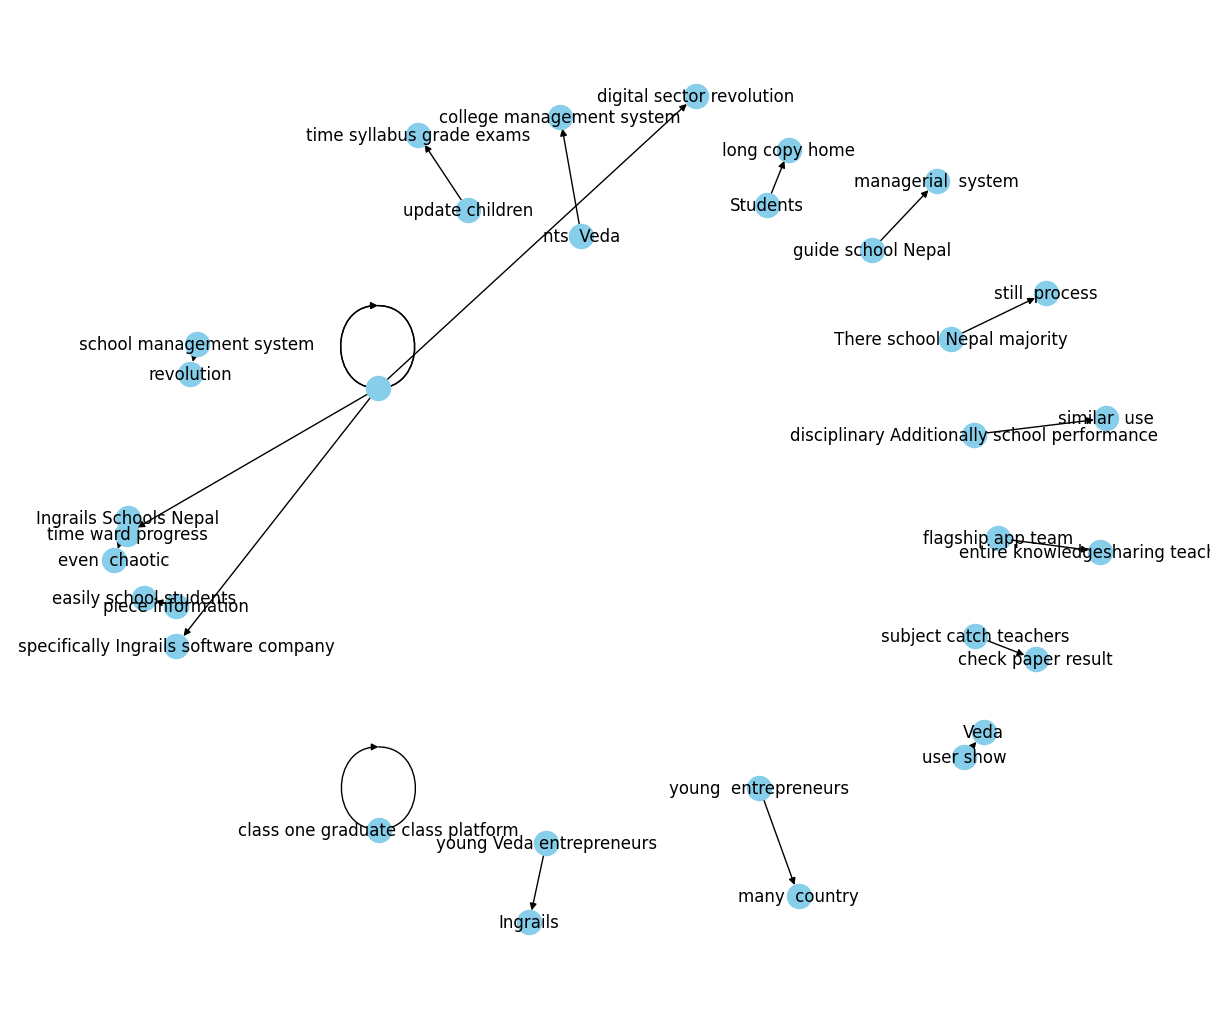

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
data=pd.DataFrame({'subject':source,'object':target,'edge':relations})
G=nx.from_pandas_edgelist(data,'subject','object',edge_attr=True,create_using=nx.MultiDiGraph)
plt.figure(figsize=(12,10))
pos=nx.spring_layout(G)
nx.draw(G,with_labels=True,node_color='skyblue',edge_cmap=plt.cm.Blues,pos=pos)
plt.show()

Here the knowledge graph show young enterpreneurs are directed toward many country.Similarly Nts veda is a school management system.

I will perform some EDA(Exploratory Data Analysis) for the same 

In [ ]:
df=pd.DataFrame(sent,columns=['sent'])
df

,sent
0,nts\n\n\n\n\n\n\n\nVeda has been a leading sch...
1,Photo: Courtesy Ingrails\nSchools in Nepal are...
2,There are students busy catching up with the s...
3,Talk to the people involved in school manageme...
4,"There are over 30,000 schools in Nepal, and th..."
5,Students have to write long papers and teacher...
6,"Then, working parents, in particular, have a h..."
7,Perhaps the sector awaits a digital revolution.
8,"Realising this, a team of young entrepreneurs ..."
9,"Now, with Veda, students and teachers save the..."


In [ ]:
df['sent']=df['sent'].replace('\n','')

<Axes: >

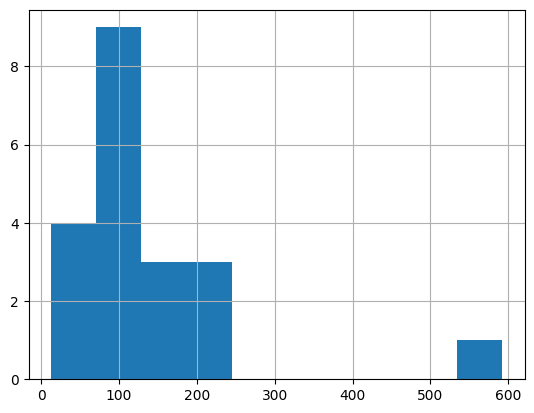

In [ ]:
df['sent'].str.len().hist()

Here most of the sentences have length 100 charactors.Some are too long of around 575 charactors.

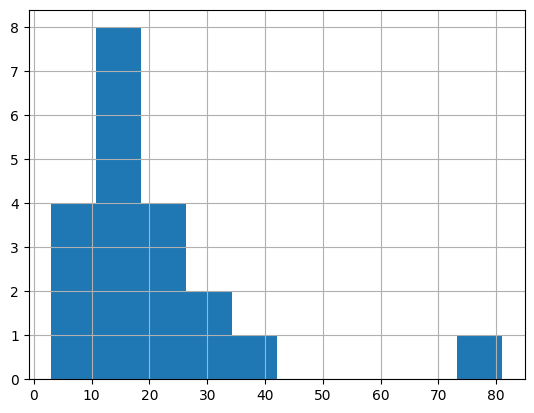

In [ ]:
def plot_word_no(text):
  text.str.split().map(lambda x:len(x)).hist()

plot_word_no(df['sent'])

Most of the sentences has word count between 10 and 20.Very few are longer and have around 40.Some seems like outliers they have around 80 words.